In [2]:
# %load mnist_softmax_gd_tf_test.py
# Copyright (c) 2016-2017, Deogtae Kim & DTWARE Inc. All rights reserved.
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ","      # cpu 사용시
# del os.environ["CUDA_VISIBLE_DEVICES"]

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()        # 커널 재시작까지 할 필요 없다.
tf.set_random_seed(107)         # 랜덤 seed를 설정해줘서 같은 랜덤 넘버가 생성(그래야 동일한 결과 재현 가능)

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
## 데이터 수집

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-labels-idx1-ubyte.gz


Instructions for updating:
Please use tf.one_hot on tensors.


Extracting MNIST_data/t10k-images-idx3-ubyte.gz


Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_fields', '_make', '_replace', '_source', 'count', 'index', 'test', 'train', 'validation']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(55000, 784)
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0. 

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
55000 (55000, 784) (55000, 10)
5000 (5000, 784) (5000, 10)
10000 (10000, 784) (10000, 10)


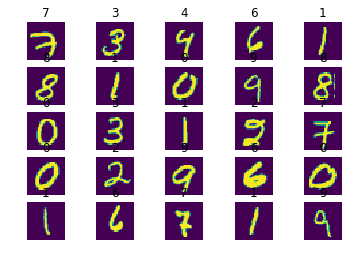

In [4]:
%matplotlib inline
## 데이터 시각화, 전처리

print(type(mnist.train))
print(dir(mnist))
print(type(mnist.train.images), type(mnist.train.labels))
print(mnist.train.images.shape)
print(mnist.train.images[0].shape)
print(mnist.train.images[0])
print(mnist.train.labels.shape)
print(mnist.train.labels[0].shape)
print(mnist.train.labels[0])
print(mnist.train.num_examples, mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.validation.num_examples, mnist.validation.images.shape, mnist.validation.labels.shape)
print(mnist.test.num_examples, mnist.test.images.shape, mnist.test.labels.shape)

fig, axes = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        axes[i,j].axis('off')
        axes[i,j].imshow(mnist.train.images[i*5+j].reshape(28,28))
        axes[i,j].set_title("%d" % np.argmax(mnist.train.labels[i*5+j]))

In [5]:
## 예측 모델 정의: 소프트맥스 회귀 모델

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
# 각 데이터에 대한 각 분류별 점수
score = tf.matmul(X, W) + b
# 각 데이터에 대한 각 분류별 확률
pred = tf.nn.softmax(score)

In [6]:
## 손실 함수, 정확도, 최적화 함수 정의

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), reduction_indices=[1]))
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))            # 예측값과 실제값 비교
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cost)      # 교차 엔트로피를 최소로 해주는 Optimizer

In [7]:
## 훈련

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
import time
start = time.time()
for epoch in range(50):
    avg_cost = 0
    batch_count = int(mnist.train.num_examples / 100)       # 1 epoch에서 미니 배치 몇개를 돌릴 것인지. (550개)
    for _ in range(batch_count):
        batch_xs, batch_ys = mnist.train.next_batch(100)    # 100개 짜리 미니 배치를 가져옴 (튜플로 리턴)
        c, _ = sess.run([cost, train_step], feed_dict={X: batch_xs, Y: batch_ys})   # _는 쓰고 버릴 익명 변수
        avg_cost += c / batch_count
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 
          ', validation accuracy = ', '{:.9f}'.format(sess.run(accuracy, feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})))
    # 결과를 보면 한번만 epoch를 거쳐도 92% 가까이 정확도가 나온다.
    # 위의 print 에서 accuracy 가 중요(검증 데이터에 대한 결과). training, test, validation data 가 모두 나눠져 있어야 한다.
    
## 모델 평가
# 밑의 accuracy는 테스트 데이터에 대한 결과
print('accuracy = ', '{:.9f}'.format(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})))
print("훈련 시간:", time.time() - start)  
sess.close()


Epoch: 0001 cost = 0.402182621 , validation accuracy =  0.917800009


Epoch: 0002 cost = 0.309374874 , validation accuracy =  0.921999991


Epoch: 0003 cost = 0.295074638 , validation accuracy =  0.922800004


Epoch: 0004 cost = 0.286868431 , validation accuracy =  0.922599971


Epoch: 0005 cost = 0.281593813 , validation accuracy =  0.924799979


Epoch: 0006 cost = 0.277443858 , validation accuracy =  0.925199986


Epoch: 0007 cost = 0.274202481 , validation accuracy =  0.925400019


Epoch: 0008 cost = 0.271264246 , validation accuracy =  0.924799979


Epoch: 0009 cost = 0.269902347 , validation accuracy =  0.926800013


Epoch: 0010 cost = 0.267272748 , validation accuracy =  0.924600005


Epoch: 0011 cost = 0.266059838 , validation accuracy =  0.927999973


Epoch: 0012 cost = 0.264333623 , validation accuracy =  0.924399972


Epoch: 0013 cost = 0.263199918 , validation accuracy =  0.925199986


Epoch: 0014 cost = 0.261819166 , validation accuracy =  0.928600013


Epoch: 0015 cost = 0.260683608 , validation accuracy =  0.926400006


Epoch: 0016 cost = 0.259695213 , validation accuracy =  0.926599979


Epoch: 0017 cost = 0.259474579 , validation accuracy =  0.924600005


Epoch: 0018 cost = 0.258424604 , validation accuracy =  0.922200024


Epoch: 0019 cost = 0.257914012 , validation accuracy =  0.927999973


Epoch: 0020 cost = 0.257346007 , validation accuracy =  0.928799987


Epoch: 0021 cost = 0.255200968 , validation accuracy =  0.928200006


Epoch: 0022 cost = 0.255524731 , validation accuracy =  0.927399993


Epoch: 0023 cost = 0.254929088 , validation accuracy =  0.929600000


Epoch: 0024 cost = 0.253464550 , validation accuracy =  0.921199977


Epoch: 0025 cost = 0.252642963 , validation accuracy =  0.925999999


Epoch: 0026 cost = 0.252888860 , validation accuracy =  0.925199986


Epoch: 0027 cost = 0.252111207 , validation accuracy =  0.927600026


Epoch: 0028 cost = 0.251548573 , validation accuracy =  0.929600000


Epoch: 0029 cost = 0.251087315 , validation accuracy =  0.931400001


Epoch: 0030 cost = 0.251267759 , validation accuracy =  0.927200019


Epoch: 0031 cost = 0.250124468 , validation accuracy =  0.928200006


Epoch: 0032 cost = 0.249870297 , validation accuracy =  0.926400006


Epoch: 0033 cost = 0.250516596 , validation accuracy =  0.927600026


Epoch: 0034 cost = 0.249380248 , validation accuracy =  0.928600013


Epoch: 0035 cost = 0.248491694 , validation accuracy =  0.926400006


Epoch: 0036 cost = 0.248609011 , validation accuracy =  0.925999999


Epoch: 0037 cost = 0.248127148 , validation accuracy =  0.926400006


Epoch: 0038 cost = 0.247307265 , validation accuracy =  0.927200019


Epoch: 0039 cost = 0.247138070 , validation accuracy =  0.927600026


Epoch: 0040 cost = 0.246866013 , validation accuracy =  0.924000025


Epoch: 0041 cost = 0.247222719 , validation accuracy =  0.928799987


Epoch: 0042 cost = 0.246241197 , validation accuracy =  0.924000025


Epoch: 0043 cost = 0.246199266 , validation accuracy =  0.929199994


Epoch: 0044 cost = 0.245382855 , validation accuracy =  0.924199998


Epoch: 0045 cost = 0.245527393 , validation accuracy =  0.925000012


Epoch: 0046 cost = 0.245270303 , validation accuracy =  0.928200006


Epoch: 0047 cost = 0.244838216 , validation accuracy =  0.924799979


Epoch: 0048 cost = 0.244837255 , validation accuracy =  0.927600026


Epoch: 0049 cost = 0.244172366 , validation accuracy =  0.927600026


Epoch: 0050 cost = 0.244644338 , validation accuracy =  0.923600018
accuracy =  0.925999999
훈련 시간: 21.379308700561523


In [8]:
## 재훈련: 최적화 알고리듬 변경 (Adam)

train_step = tf.train.AdamOptimizer(0.001).minimize(cost)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
import time
start = time.time()
for epoch in range(50):
    avg_cost = 0
    batch_count = int(mnist.train.num_examples / 100)
    for _ in range(batch_count):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        c, _  = sess.run([cost, train_step], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / batch_count
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 
          ', validation accuracy = ', '{:.9f}'.format(sess.run(accuracy, feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})))
    
print('accuracy = ', '{:.9f}'.format(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})))
print("훈련 시간:", time.time() - start)  

## 모델 평가

print(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
sess.close()


Epoch: 0001 cost = 0.635412880 , validation accuracy =  0.902999997


Epoch: 0002 cost = 0.352473053 , validation accuracy =  0.916000009


Epoch: 0003 cost = 0.314382392 , validation accuracy =  0.921199977


Epoch: 0004 cost = 0.296194850 , validation accuracy =  0.922399998


Epoch: 0005 cost = 0.285643568 , validation accuracy =  0.925599992


Epoch: 0006 cost = 0.278015420 , validation accuracy =  0.926599979


Epoch: 0007 cost = 0.272453250 , validation accuracy =  0.925000012


Epoch: 0008 cost = 0.267920785 , validation accuracy =  0.925999999


Epoch: 0009 cost = 0.264479514 , validation accuracy =  0.928399980


Epoch: 0010 cost = 0.261376457 , validation accuracy =  0.925199986


Epoch: 0011 cost = 0.258991400 , validation accuracy =  0.927600026


Epoch: 0012 cost = 0.257020963 , validation accuracy =  0.928799987


Epoch: 0013 cost = 0.254849285 , validation accuracy =  0.926999986


Epoch: 0014 cost = 0.253187945 , validation accuracy =  0.928200006


Epoch: 0015 cost = 0.251508746 , validation accuracy =  0.929799974


Epoch: 0016 cost = 0.250003543 , validation accuracy =  0.930000007


Epoch: 0017 cost = 0.248631061 , validation accuracy =  0.928200006


Epoch: 0018 cost = 0.247426515 , validation accuracy =  0.929400027


Epoch: 0019 cost = 0.246180694 , validation accuracy =  0.930199981


Epoch: 0020 cost = 0.245207635 , validation accuracy =  0.930599988


Epoch: 0021 cost = 0.244963663 , validation accuracy =  0.930199981


Epoch: 0022 cost = 0.243772535 , validation accuracy =  0.930000007


Epoch: 0023 cost = 0.242799851 , validation accuracy =  0.930800021


Epoch: 0024 cost = 0.241762322 , validation accuracy =  0.928600013


Epoch: 0025 cost = 0.241423342 , validation accuracy =  0.929199994


Epoch: 0026 cost = 0.240829450 , validation accuracy =  0.928200006


Epoch: 0027 cost = 0.240065318 , validation accuracy =  0.928799987


Epoch: 0028 cost = 0.239291749 , validation accuracy =  0.930199981


Epoch: 0029 cost = 0.238804426 , validation accuracy =  0.927999973


Epoch: 0030 cost = 0.238305500 , validation accuracy =  0.928600013


Epoch: 0031 cost = 0.237582333 , validation accuracy =  0.930000007


Epoch: 0032 cost = 0.237017363 , validation accuracy =  0.931599975


Epoch: 0033 cost = 0.236670336 , validation accuracy =  0.930400014


Epoch: 0034 cost = 0.236329013 , validation accuracy =  0.930999994


Epoch: 0035 cost = 0.235790084 , validation accuracy =  0.930400014


Epoch: 0036 cost = 0.234973014 , validation accuracy =  0.930400014


Epoch: 0037 cost = 0.234714930 , validation accuracy =  0.929400027


Epoch: 0038 cost = 0.234399596 , validation accuracy =  0.930599988


Epoch: 0039 cost = 0.233820642 , validation accuracy =  0.930599988


Epoch: 0040 cost = 0.233721750 , validation accuracy =  0.929000020


Epoch: 0041 cost = 0.233088217 , validation accuracy =  0.928399980


Epoch: 0042 cost = 0.232938872 , validation accuracy =  0.929600000


Epoch: 0043 cost = 0.232733904 , validation accuracy =  0.930800021


Epoch: 0044 cost = 0.232294248 , validation accuracy =  0.927200019


Epoch: 0045 cost = 0.232154672 , validation accuracy =  0.929199994


Epoch: 0046 cost = 0.231451694 , validation accuracy =  0.927600026


Epoch: 0047 cost = 0.231438948 , validation accuracy =  0.929000020


Epoch: 0048 cost = 0.231040797 , validation accuracy =  0.927999973


Epoch: 0049 cost = 0.230339534 , validation accuracy =  0.926599979


Epoch: 0050 cost = 0.230086151 , validation accuracy =  0.930400014
accuracy =  0.925999999
훈련 시간: 22.457908868789673
0.926
